<b> Functions <b>

In [1]:
from qutip import *
import pylab as py
import numpy as np
import matplotlib.pyplot as plt



def heaviside(x):
    if x >= 0 :
        return 1
    if x < 0 :
        return 0
    
def nega(rho, subsys):
    
    #create mask which counts the number of possible subsystems
    x = [0 for i in rho.dims[0]]
   
    #assigns a 1 in the position of the subsystem for which we want to compute the negativity
    x[subsys] = 1
        
    #takes partial transpose with respect to subsys x
    rho_pt = partial_transpose(rho, x)
    
    #finds eivenvalues of pt matrix
    eig = rho_pt.eigenenergies()
    
    #finds abs value of the eigenvalues
    abs_eig = abs(eig)
    
    negat = 0 #initialize value of negativity
    
    #takes the difference 
    diff = (abs_eig - eig)
    
    
    #computes negativity
    for el in diff:
        negat += el

    
    return negat


def three_pi(rho):
    
    #determine pi_a
    N_a_b = nega(rho.ptrace([1,2]),0)
    
    N_a_c = nega(rho.ptrace([1,3]),0)
    
    N_a_bc = nega(rho.ptrace([1,2,3]), 0)
    
    pi_a = max(0,(N_a_bc)**2 - (N_a_b)**2 - (N_a_c)**2)
    
    
    #determine pi_b
    N_b_a = nega(rho.ptrace([1,2]),1)
    
    N_b_c = nega(rho.ptrace([1,3]),0)
    
    N_b_ac = nega(rho.ptrace([1,2,3]), 1)
    
    pi_b = max(0,(N_b_ac)**2 - (N_b_a)**2 - (N_b_c)**2)
    
    #determine pi_c
    N_c_a = nega(rho.ptrace([1,3]),1)
    
    N_c_b = nega(rho.ptrace([2,3]),0)
    
    N_c_ab = nega(rho.ptrace([1,2,3]), 2)
    
    pi_c = max(0,(N_c_ab)**2 - (N_c_a)**2 - (N_c_b)**2)
    
    return (pi_a + pi_b + pi_c)/3

<b> Parameters <b>

In [2]:
# wc = 1   #frequency of cavity photons
# wa = 1  #frequency of qubits


# N = 3      # number of cavity fock states (N-1 photons inn the cavity)
# n_th_a = 0.0           # temperature in frequency units
# g = 0.05*wc # coupling strength

# #time settings
# ti = 0
# tf = 10000
# steps = 20000
# t_list = np.linspace(ti,tf,steps) # vector of time steps

# #dissipation parameters
# kappa = 0.0      # cavity dissipation rate
# gamma1 = 0.01*kappa     # atom 1 dissipation rate
# gamma2 = 0.01*kappa    # atom 2 dissipation rate
# gamma3 = 0.01*kappa     # atom 3 dissipation rate



# wc = 10**(9)*2*np.pi*4.343 # frequency of the cavity photons
# wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits


# N = 2      # number of cavity fock states (N-1 photons inn the cavity)
# n_th_a = 0.0           # temperature in frequency units
# g = 10**(6)*2*np.pi*300 # coupling strength

# kappa = 2*np.pi*1.6*10**(6)      # cavity dissipation rate
# gamma1 = 2*np.pi*7.6*10**(3)    # atom 1 dissipation rate
# gamma2 = 2*np.pi*7.6*10**(3)     # atom 2 dissipation rate
# gamma3 = 2*np.pi*7.6*10**(3)     # atom 3 dissipation rate


#time settings
ti = 0 #initial time
tf = 10**(-9)*40 #final time
steps = 2001 #number of steps
tau_list = np.linspace(ti,tf,steps) # vector of time steps

cycles = 201 # number of variations of parameters
pi = 3/4
pf = 5/4
par_list = np.linspace(pi,pf,cycles)
par_range = [0 for i in range(cycles)]

print(par_list)

#measures of entanglement

neg = np.zeros([cycles, steps]) #negativity

res_pi = np.zeros([cycles, steps]) #initialize vector of numerical time evolved three-pi


[0.75   0.7525 0.755  0.7575 0.76   0.7625 0.765  0.7675 0.77   0.7725
 0.775  0.7775 0.78   0.7825 0.785  0.7875 0.79   0.7925 0.795  0.7975
 0.8    0.8025 0.805  0.8075 0.81   0.8125 0.815  0.8175 0.82   0.8225
 0.825  0.8275 0.83   0.8325 0.835  0.8375 0.84   0.8425 0.845  0.8475
 0.85   0.8525 0.855  0.8575 0.86   0.8625 0.865  0.8675 0.87   0.8725
 0.875  0.8775 0.88   0.8825 0.885  0.8875 0.89   0.8925 0.895  0.8975
 0.9    0.9025 0.905  0.9075 0.91   0.9125 0.915  0.9175 0.92   0.9225
 0.925  0.9275 0.93   0.9325 0.935  0.9375 0.94   0.9425 0.945  0.9475
 0.95   0.9525 0.955  0.9575 0.96   0.9625 0.965  0.9675 0.97   0.9725
 0.975  0.9775 0.98   0.9825 0.985  0.9875 0.99   0.9925 0.995  0.9975
 1.     1.0025 1.005  1.0075 1.01   1.0125 1.015  1.0175 1.02   1.0225
 1.025  1.0275 1.03   1.0325 1.035  1.0375 1.04   1.0425 1.045  1.0475
 1.05   1.0525 1.055  1.0575 1.06   1.0625 1.065  1.0675 1.07   1.0725
 1.075  1.0775 1.08   1.0825 1.085  1.0875 1.09   1.0925 1.095  1.0975
 1.1  

<b> Numerical solution <b>

In [3]:
for j in range(0, cycles):

    #TUNE FREQUENCY OF SWITCHING

    #transition frequency
    wc = 10**(9)*2*np.pi*4.343  # frequency of the cavity photons
    wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
    wd = 2*wa*par_list[j] #frequency of switching of coupling

    par_range[j] = wd

    N = 2      # number of cavity fock states (N-1 photons inn the cavity)
    n_th_a = 0.0           # temperature in frequency units
    g = 10**(6)*2*np.pi*300 # coupling strength


    #dissipation
    kappa = 1.6*2*np.pi*10**(6)     # cavity dissipation rate
    gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
    gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
    gamma3 = 7.6*2*np.pi*10**(3)     # atom 3 dissipation rate
    gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
    gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate
    gamma_phi3 = 3*2*np.pi*10**(3)     # atom 3 dephasing rate


    # intial state
    psi0 = tensor(basis(N,0), basis(2,0), basis(2,0), basis(2,0))    # start with 0 excited atoms and 0 photons


    # density matrix
    rho0 = ket2dm(psi0)


    # operators
    a  = tensor(destroy(N), qeye(2), qeye(2), qeye(2)) #destroy cavity photon
    sm1 = tensor(qeye(N), destroy(2),qeye(2), qeye(2)) #destroy atom1 excitation
    sm2 = tensor(qeye(N), qeye(2),destroy(2), qeye(2)) #destroy atom2 excitation
    sm3 = tensor(qeye(N), qeye(2), qeye(2), destroy(2)) #destroy atom3 excitation


    #list of collapse operator (dissipation ops) for separate baths (for Lindblad's equation)    
    c_op_list = []

    rate = kappa #photon dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a) 


    rate = gamma1 #atom1 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm1)

    rate = gamma2 #atom2 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm2)

    rate = gamma3 #atom2 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm3)

    rate = gamma_phi1 #atom1 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm1.dag()*sm1 - qeye(1))/2) )

    rate = gamma_phi2 #atom2 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm2.dag()*sm2 - qeye(1))/2) )

    rate = gamma_phi3 #atom3 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm3.dag()*sm3 - qeye(1))/2) )



    #Hamiltonian

    def H1_coeff(t,args):
        coeff = g*heaviside(np.cos((wd)*t))
        return coeff

    H0 = wc*a.dag()*a + wa*sm1.dag()*sm1 + wa*sm2.dag()*sm2 + wa*sm3.dag()*sm3

    H1 = (a.dag()*sm1 + a*sm1.dag() + a.dag()*sm2 + a*sm2.dag() + a.dag()*sm3 + a*sm3.dag()  + a*sm1 + a.dag()*sm1.dag() + a*sm2 + a.dag()*sm2.dag() + a*sm3 + a.dag()*sm3.dag() )


    H = [H0,[H1,H1_coeff]]




    #solve master equation
    #output = mesolve(H, rho0, tau_list, c_op_list, [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2 , sm3.dag() * sm3])  #stores expectation values of number of phontons, excitation of atom 1, 2, 3 

    result = mesolve(H, rho0, tau_list, c_op_list)  #stores density matrix operator changing in time



    # # plot excitation probabilities of photons and atoms
    # plt.plot(t_list, output.expect[0], label="Cavity")
    # plt.plot(t_list, output.expect[1], label="Atom 1 excited state")
    # plt.plot(t_list, output.expect[2], label="Atom 2 excited state")
    # plt.plot(t_list, output.expect[3], label="Atom 3 excited state")
    # plt.legend()
    # plt.xlabel('Time')
    # plt.ylabel('Occupation probability')
    # plt.title('Vacuum Rabi oscillations');
    # plt.show()


    x = [1,2,3] # selects the system to NOT trace over (0=photons, 1=atom1, 2=atom2, 3=atom3)

    #computes the time evolution of the negativity
    for i in range(steps):
        
        states = result.states[i]*result.states[i].dag() # creates density matrix at each time 

        rhoqub = states.ptrace(x) # traces over the photonic degrees of freedom to obtain the density matrix of the qubits

        neg[j][i] = nega(rhoqub, 0) #find negativity

        res_pi[j][i] = three_pi(states) #find three-pi

np.save('data/neg_3q_fs', neg)
np.save('data/tpi_3q_fs', res_pi)


    # #plot numerical negativity
    # plt.plot(t_list, neg)
    # plt.xlabel('Time')
    # plt.ylabel('Negativity')
    # plt.show()

    # #plot numerical three-pi
    # plt.plot(t_list, res_pi)
    # plt.xlabel('Time')
    # plt.ylabel('Three-pi')
    # plt.show()


    print(j)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


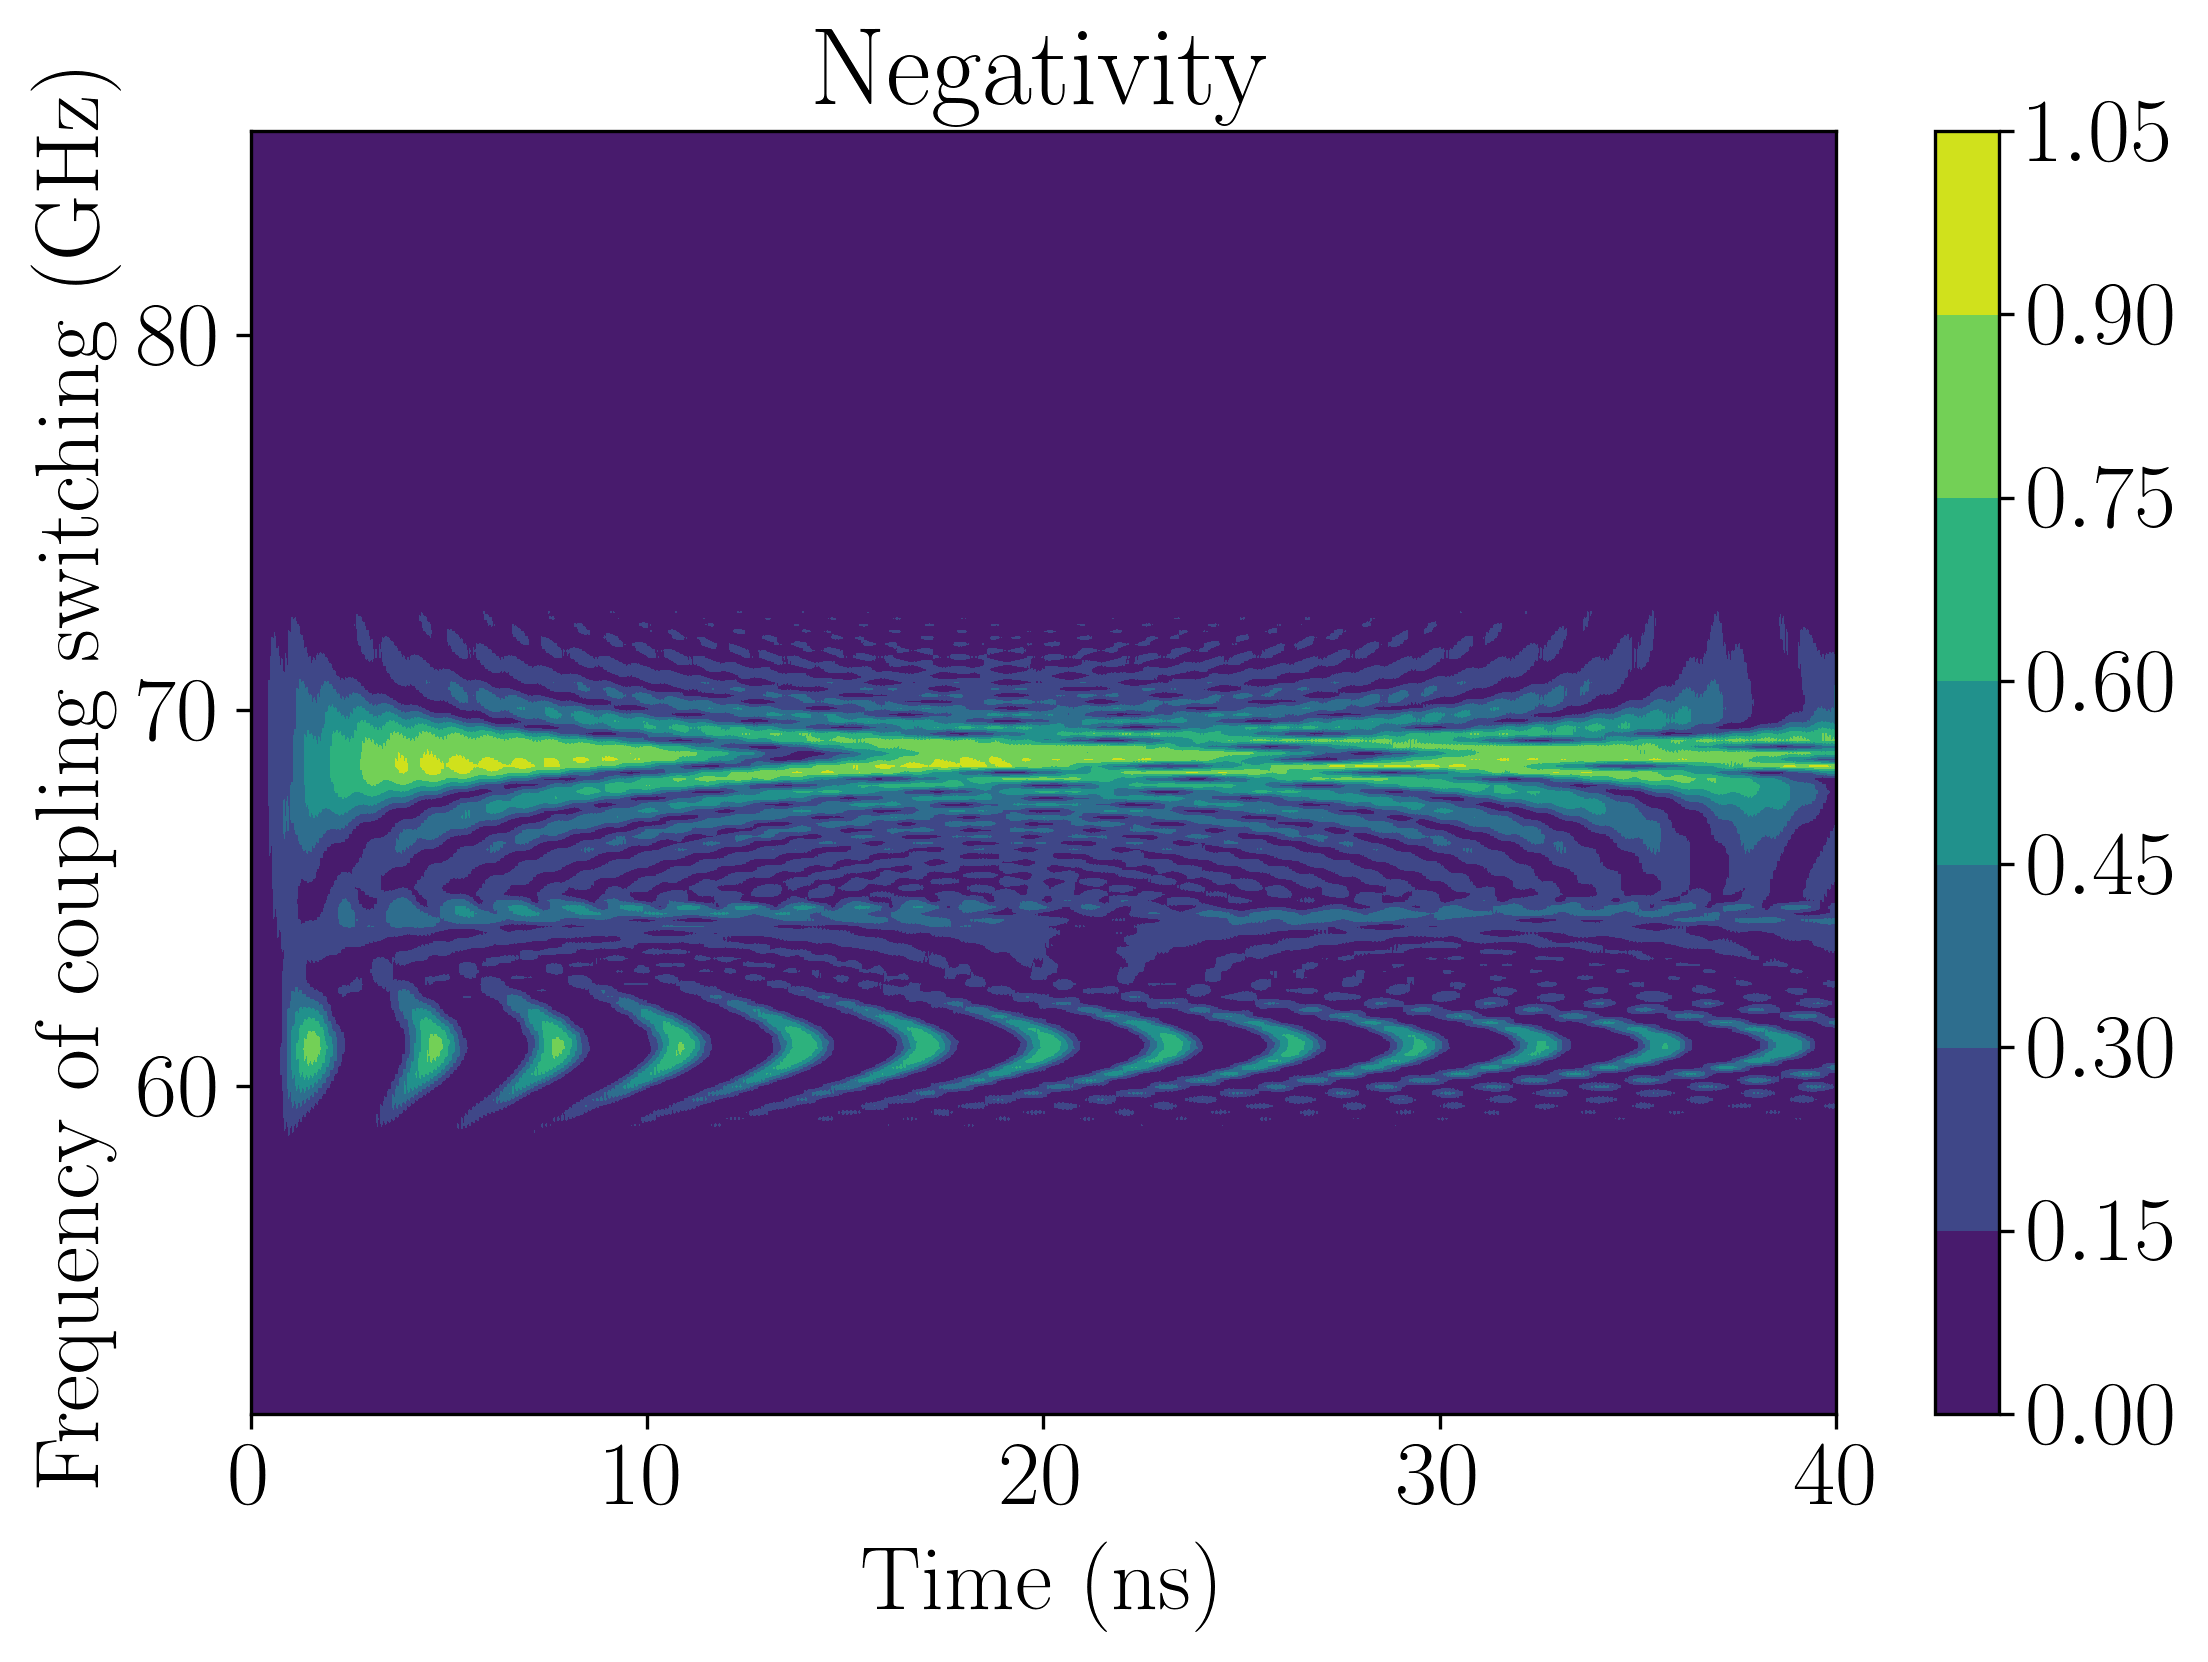

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


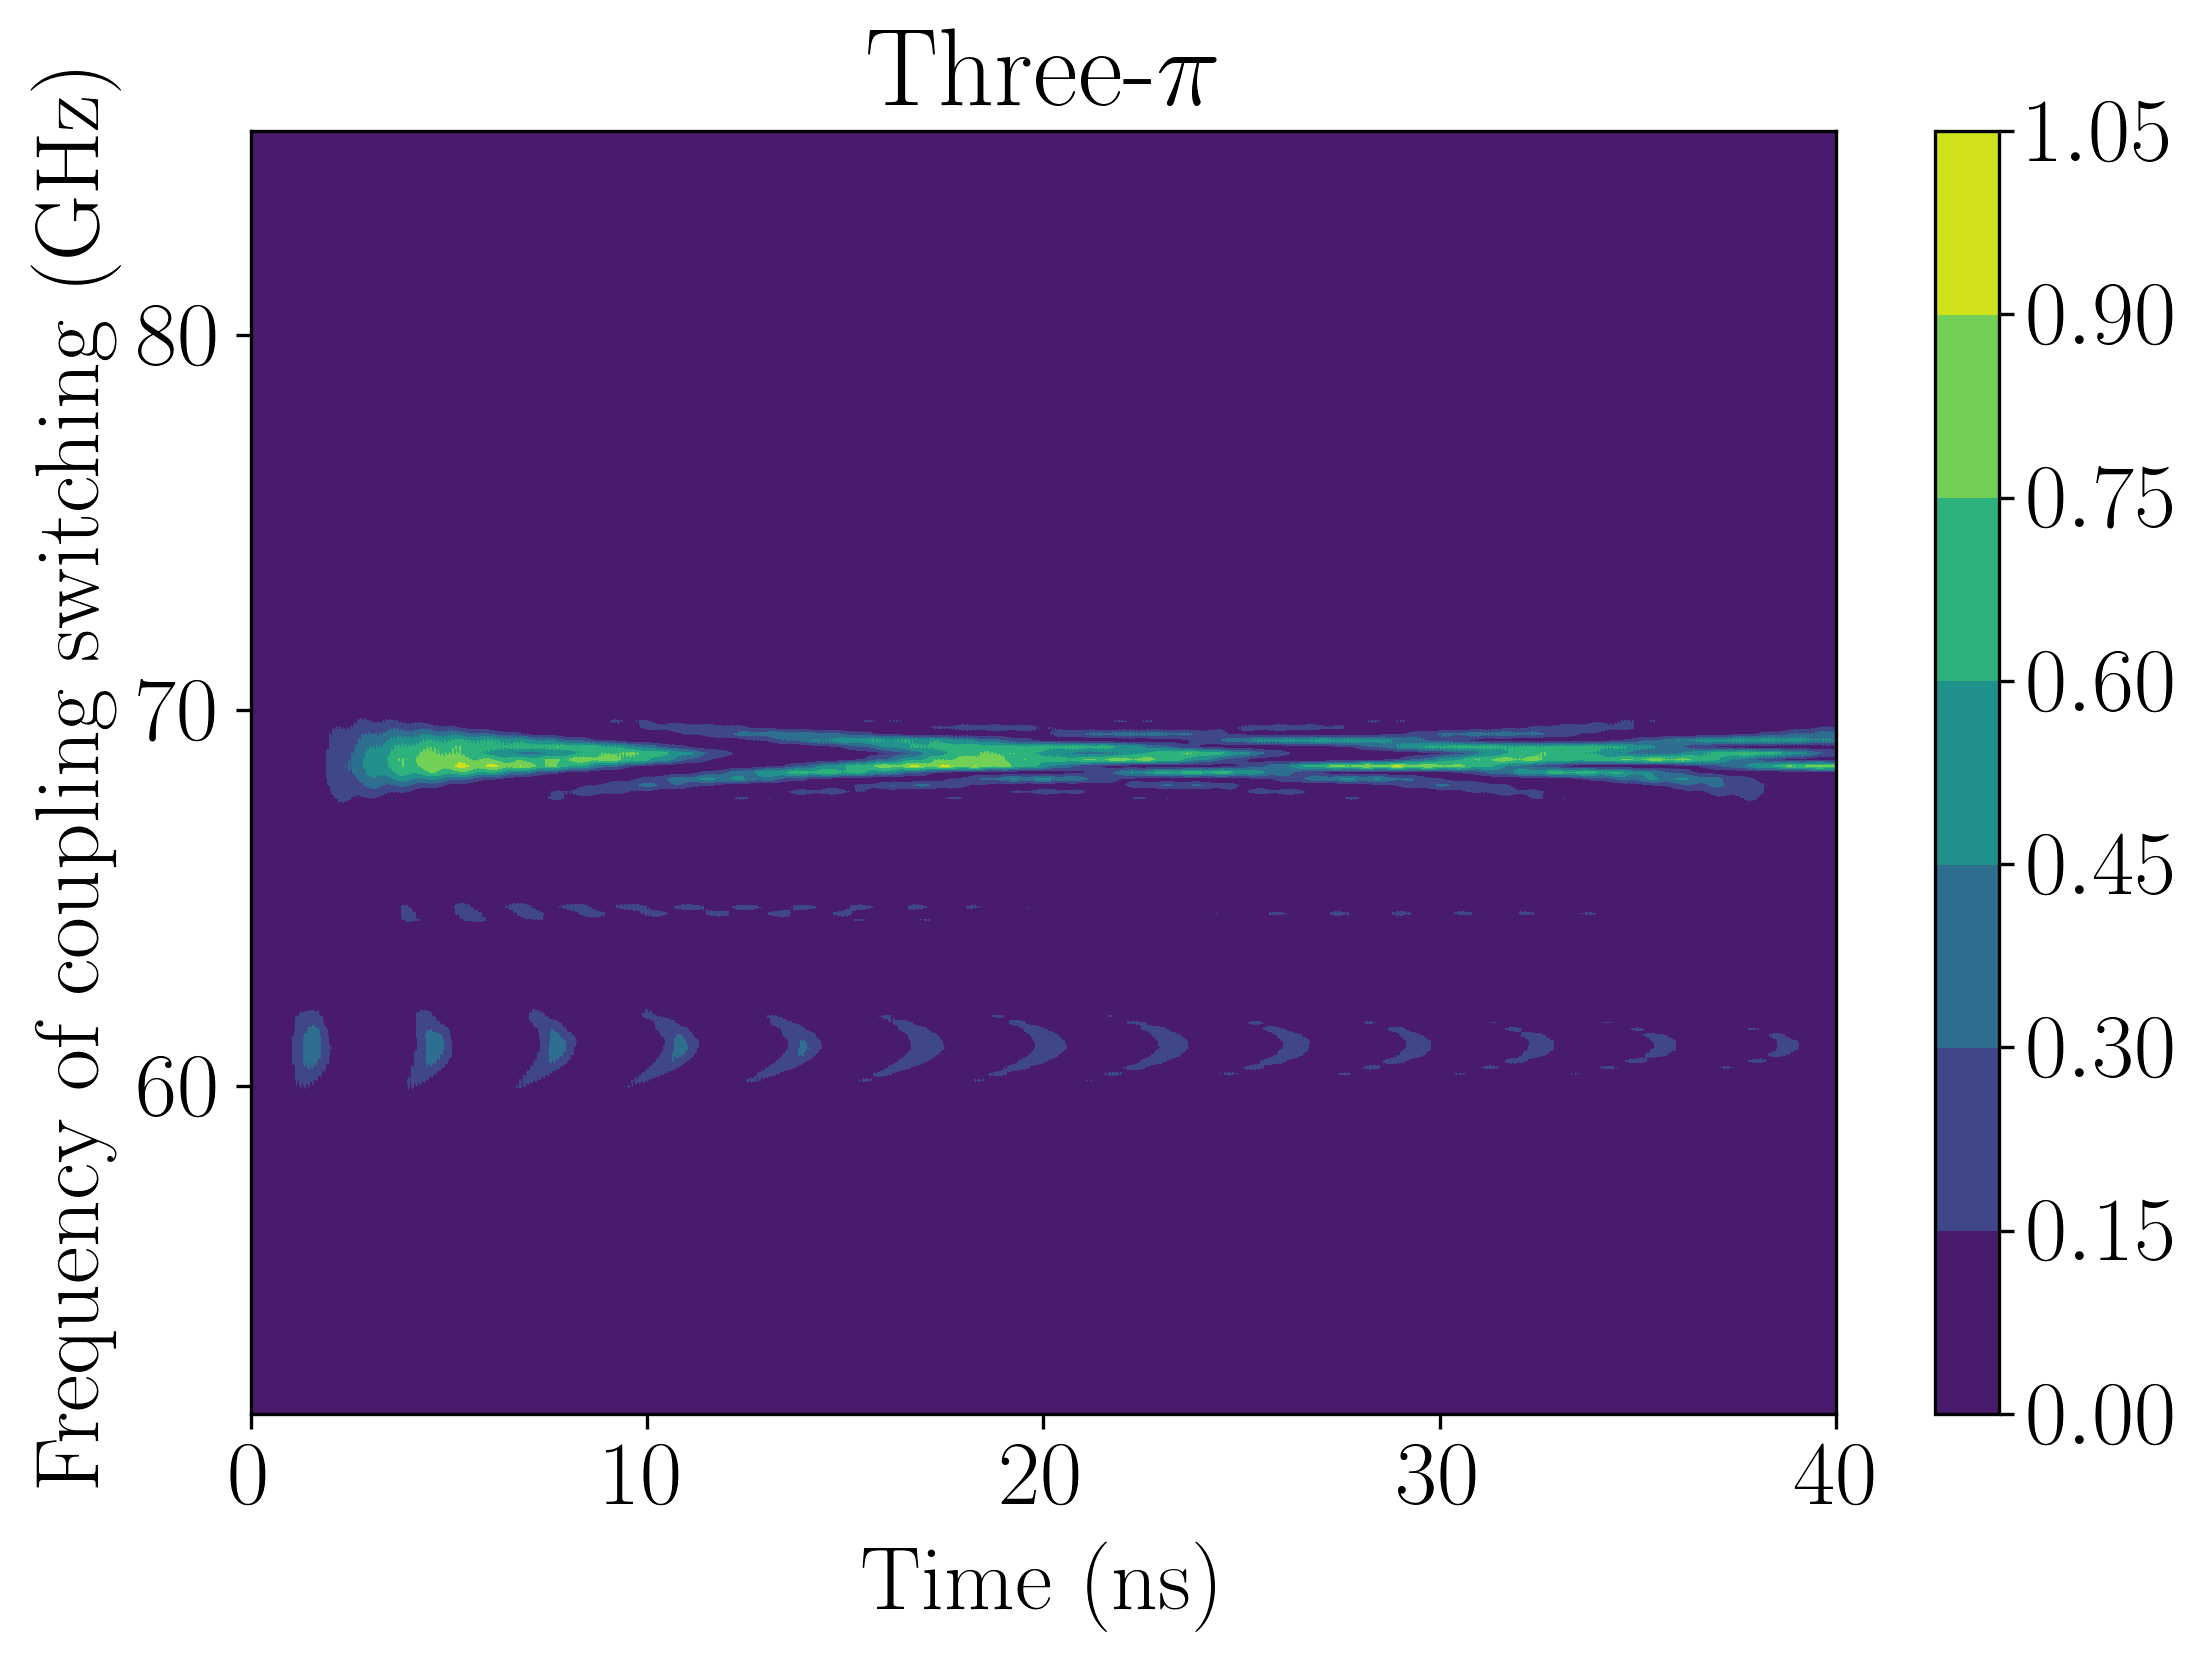

In [31]:

#changes plot parameters
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



n = np.load("data/neg_3q_fs.npy")
t = np.load("data/tpi_3q_fs.npy")

# par_range = [x*10**9 for x in par_range] # normalizes freq.


# plot time evolution of negativity (x = time) for different values of wd (y = wd)


plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.contourf(tau_list*10**9,par_range,n)
plt.xlabel(r' Time (ns)', fontsize = 22)
plt.ylabel(r' Frequency of coupling switching (GHz)', fontsize = 22)
plt.colorbar()  # draw colorbar
plt.title('Negativity')
plt.savefig('negativity_3q_fs.eps', dpi = 300)
plt.show()



# plot time evolution of three-pi (x = time) for different values of wd (y = wd)

plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.contourf(tau_list*10**9,par_range,t)
plt.xlabel(' Time (ns)', fontsize = 22)
plt.ylabel(' Frequency of coupling switching (GHz)', fontsize = 22)
plt.colorbar()  # draw colorbar
plt.title(r'Three-$\pi$')
plt.savefig('threepi_3q_fs.eps', dpi = 300)
plt.show()

# plt.contourf(tau_list,par_range,t)
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency of coupling switching [Hz]')
# plt.title('Three-pi')
# plt.colorbar()  # draw colorbar
# plt.savefig('threepi_3q_fs.pdf', dpi = 300)
# plt.show()